In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [55]:
df1 = pd.read_csv('Datasets/charger_dataset.csv')
df1.head()

,Region,2W,3W,4W,Bus,Chargers
0,Uttar Pradesh,9852,42881,458,197,207
1,Maharastra,38558,893,1895,186,317
2,Karnataka,32844,568,589,57,172
3,Tamil Nadu,25642,396,426,0,256
4,Gujarat,22359,254,423,22,228


In [56]:
df2= pd.read_csv('Datasets/charging_station_dataset.csv')

In [57]:
df2.head()

,"The number of electric vehicles currently being used on the roads of India, State wise as on\n\n14-07-2022",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Sr. No.,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total
1,1,Andaman & Nicobar Island,162,146945,147107
2,2,Arunachal Pradesh,20,252965,252985
3,3,Assam,64766,4677053,4741819
4,4,Bihar,83335,10407078,10490413


In [58]:
df3 = pd.read_csv("Datasets/market_india_dataset.csv")
df3.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [59]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Region    24 non-null     object
 1   2W        24 non-null     int64 
 2   3W        24 non-null     int64 
 3   4W        24 non-null     int64 
 4   Bus       24 non-null     int64 
 5   Chargers  24 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.2+ KB


In [60]:
df1.isnull().sum()

Region      0
2W          0
3W          0
4W          0
Bus         0
Chargers    0
dtype: int64

In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                    --------------  ----- 
 0   The number of electric vehicles currently being used on the roads of India, State wise as on

14-07-2022  34 non-null     object
 1   Unnamed: 1                                                                                                34 non-null     object
 2   Unnamed: 2                                                                                                34 non-null     object
 3   Unnamed: 3                                                                                                34 non-null     object
 4   Unnamed: 4                                                                               

In [62]:
df2.isnull().sum()

The number of electric vehicles currently being used on the roads of India, State wise as on\n\n14-07-2022    0
Unnamed: 1                                                                                                    0
Unnamed: 2                                                                                                    0
Unnamed: 3                                                                                                    0
Unnamed: 4                                                                                                    0
dtype: int64

In [63]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 11.4+ KB


In [64]:
df3.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [65]:
df4 = pd.read_csv('Datasets/behaviour.csv')
df4.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [66]:
df4.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

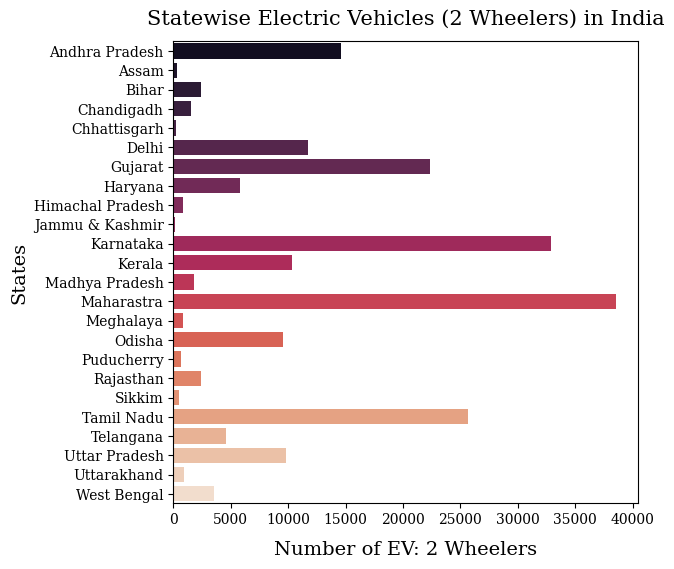

In [71]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['Region'].sort_values(ascending=True), x='2W', palette='rocket')
plt.ylabel('States', fontsize=14, family='serif')
plt.xlabel('Number of EV: 2 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (2 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

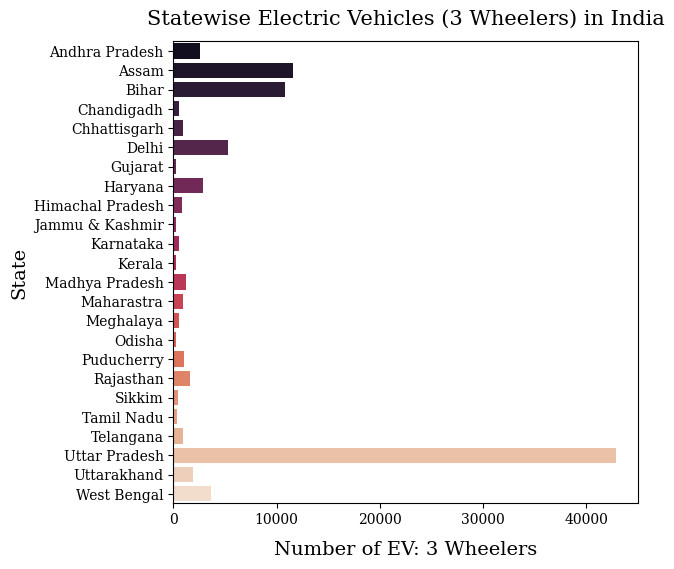

In [73]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['Region'].sort_values(ascending=True), x='3W', palette='rocket')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 3 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (3 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

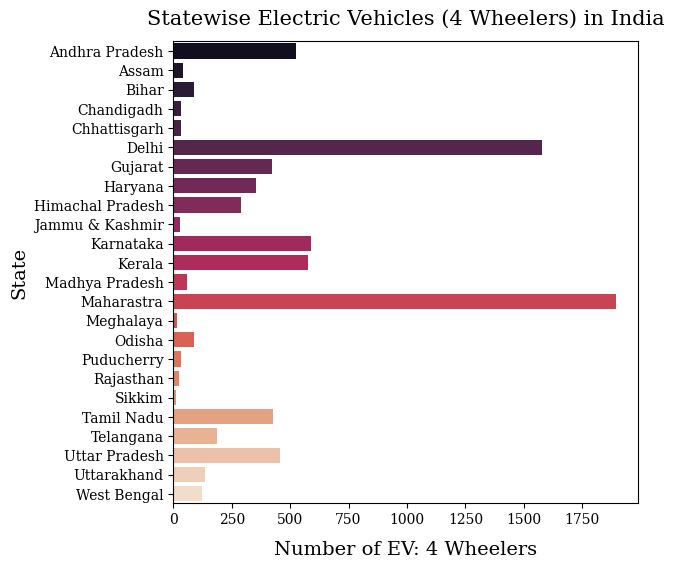

In [74]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['Region'].sort_values(ascending=True), x='4W', palette='rocket')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 4 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (4 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.show()